# E-news Express Project


## Define Problem Statement and Objectives

### Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.


### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

* Do the users spend more time on the new landing page than on the existing landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the time spent on the new page the same for the different language users?


### Data Description

The data contains information regarding the interaction of users in both groups with the two versions of the landing page. The detailed data dictionary is given below.


### Data Dictionary

* `user_id`: Unique user ID of the person visiting the website
* `group`: Whether the user belongs to the first group (control) or the second group (treatment)
* `landing_page`: Whether the landing page is new or old
* `time_spent_on_the_page`: Time (in minutes) spent by the user on the landing page
* `converted`: Whether the user gets converted to a subscriber of the news portal or not
* `language_preferred`: Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Import libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Import libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to display graphs
%matplotlib inline

# Import library to help with statistical analysis
import scipy.stats as stats

# Restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# Let colab access Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [ ]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/DSBA/Business-Statistics/Project/abtest.csv')

# Make a copy of data to avoid overwriting original
user_data = df.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

**View the first and last 5 rows of the dataset**

In [ ]:
# Return the first 5 rows
user_data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
3,546567,control,old,3.020,no,French
4,546459,treatment,new,4.750,yes,Spanish


In [ ]:
# Return the last 5 rows
user_data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.150,no,Spanish
96,546544,control,old,6.520,yes,English
97,546472,treatment,new,7.070,yes,Spanish
98,546481,treatment,new,6.200,yes,Spanish
99,546483,treatment,new,5.860,yes,English


**Understand the shape of the dataset and data types contained**

In [ ]:
# Use info() to print a concise summary of the DataFrame
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:
* The dataset has 100 rows and 6 columns
* There is 1 64-bit integer column, 1 64-bit float column, and 4 object type columns
* customer_id is read as numerical columns, but should be an object type columns
* The group, landing_page, and converted columns are binary variables

In [ ]:
# Change the data type of user ID to strings
user_data['user_id'] = user_data['user_id'].astype(str)

**Check for missing values and duplicate entries in the data**

In [ ]:
# Return sum of null values in each column by default
user_data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
user_data.duplicated().sum()

0

Observations:
* There are no null values in the dataset
* There are no duplicate entries in the data

**View statistical summary of the data**

In [ ]:
# Use describe() to print a concise statistical summary of all the data
user_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100,100,546592,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.000,NaN,NaN,NaN,5.378,2.378,0.190,3.880,5.415,7.022,10.710
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
* `user_id`: Each data entry is associated with a distinct user
* `group`: The dataset is evenly divided between users that were served the old landing page and those that that were served the new page
* `time_spent_on_the_page`: On average a user spends 5.378 minutes on the landing page, while the median is 5.415 minutes. There is a huge difference between the minimum value and the 25% percentile, which indicates that there may be outliers present.
* `converted`: 54 users in the dataset converted
* `language_preferred`: Spanish appears to be the most preferred language, with 34 entries

### Univariate Analysis

**User ID**

In [ ]:
# Check number of unique users
user_data['user_id'].nunique()

100

Observations:
* There are 100 unique users.
* As observed in the statistical summary above, each data entry represents a distinct user.

**Group**

In [ ]:
# Check number of unique groups
user_data['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

Observations:
* There are only two unique groups as was described in the problem statement: control and treatment.
* The users are evenly split between the two groups.

**Landing Page**

In [ ]:
# Check number of unique landing pages
user_data['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

Observations:
* There are only two unique landing pages as was described in the problem statement: the existing page and the redesigned page.
* The users are evenly split between the two landing pages. This matches the data observed in the group column.

**Time Spent on the Page**

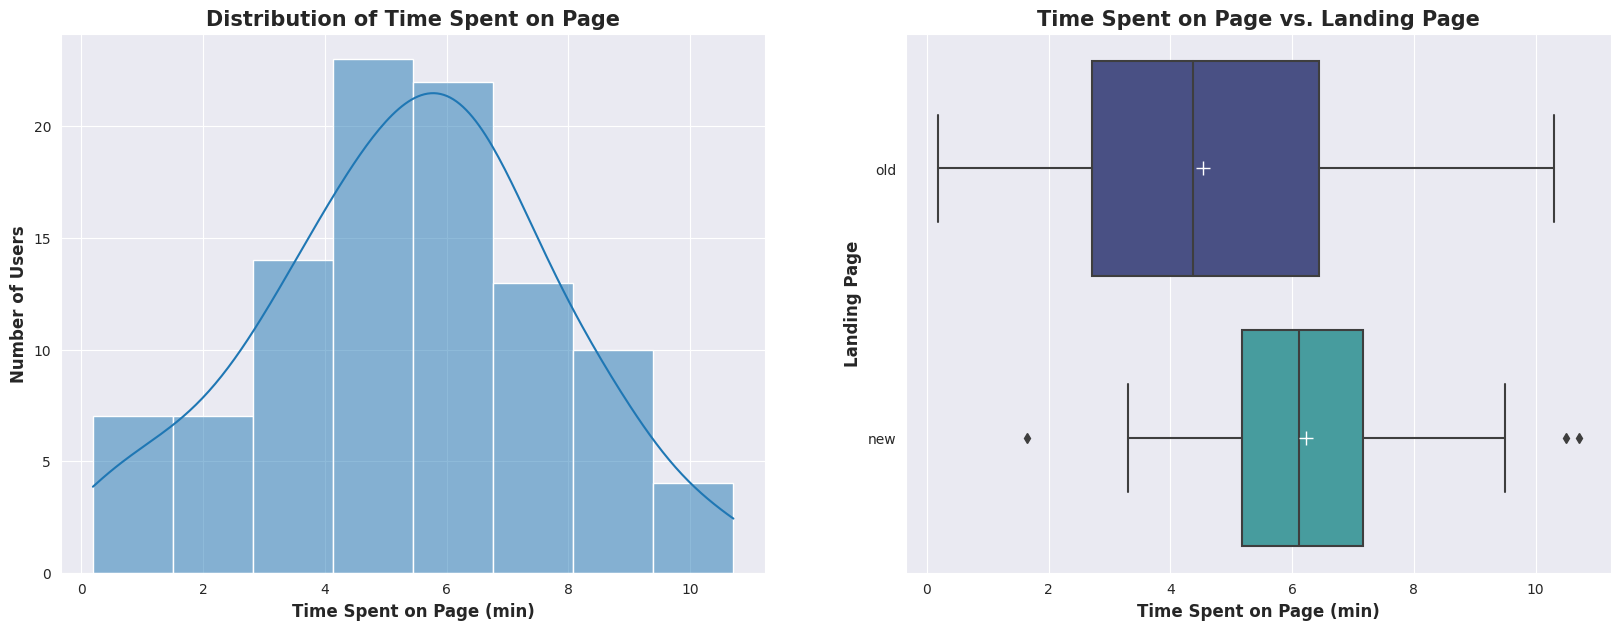

In [ ]:
# Change default background style
sns.set_style("darkgrid")

# Set axis label style
label_fontdict = {'weight': 'bold', 'size': 12}

# Set subplot title style
subplot_fontdict = {'weight': 'bold', 'size': 15}

# Set mean marker style
meanprops_dict = {"marker": "+", "markeredgecolor": "white", "markersize": "10"}

# Create 2 subplots in 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the histogram
time_hist = sns.histplot(data=user_data, x='time_spent_on_the_page', kde=True,
                         ax=axes[0]);
time_hist.set_ylabel('Number of Users', fontdict=label_fontdict)
time_hist.set_title('Distribution of Time Spent on Page',
                    fontdict=subplot_fontdict)

# Plot the boxplot
time_box = sns.boxplot(data=user_data, x='time_spent_on_the_page',
                       y='landing_page', showmeans=True,
                       meanprops=meanprops_dict, palette='mako', ax=axes[1]);
time_box.set_ylabel('Landing Page', fontdict=label_fontdict);
time_box.set_title('Time Spent on Page vs. Landing Page', fontdict=subplot_fontdict)

for ax in axes.flat:
  ax.set_xlabel('Time Spent on Page (min)', fontdict=label_fontdict)

Observations:
* The combined data (represented in the histogram) has an approximately normal distribution.
* There are three outliers in the time spent on the new landing page, but none for the time spent on the old page.
* The time spend on the old landing page has a slight right skew, while the time spend on the new page approximates a normal distribution.
* The new landing page has a higher minimum, median and mean user time spend than the old landing page.
* The time spend variation for the new landing page is less than that of the old page.

**Converted**

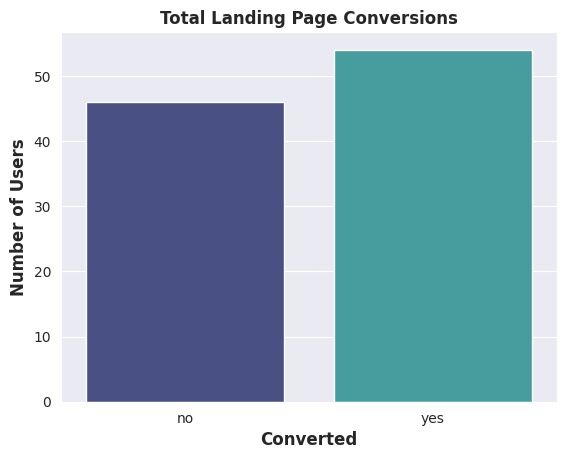

In [ ]:
# Set title
plt.title("Total Landing Page Conversions", fontweight='bold')

# Plot the countplot
conv_count = sns.countplot(data=user_data, x='converted', palette='mako')

# Set title
conv_count.set_xlabel('Converted', font=label_fontdict)
conv_count.set_ylabel('Number of Users', font=label_fontdict);

Observations:
* The distribution shows that about 10 additional users became new subscribers compared to those that did not.
* As the number that converted is larger than the number of users in each group, it suggests that there was a shift in user behavior.

**Language Preferred**

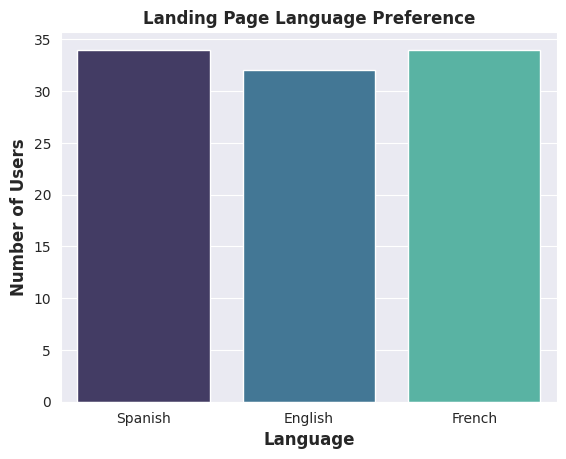

In [ ]:
# Set title
plt.title("Landing Page Language Preference", fontweight='bold')

# Plot the countplot
lang_count = sns.countplot(data=user_data, x='language_preferred',
                           palette='mako')

# Set title
lang_count.set_xlabel('Language', font=label_fontdict)
lang_count.set_ylabel('Number of Users', font=label_fontdict);

Observations:
* The language_preferred column contains three unique languages: Spanish, French, and English.
* Language preference is roughly evenly distributed, with only a slight preference for Spanish and French.

### Bivariate Analysis

**Time Spent on Landing Page Across Different Variables**

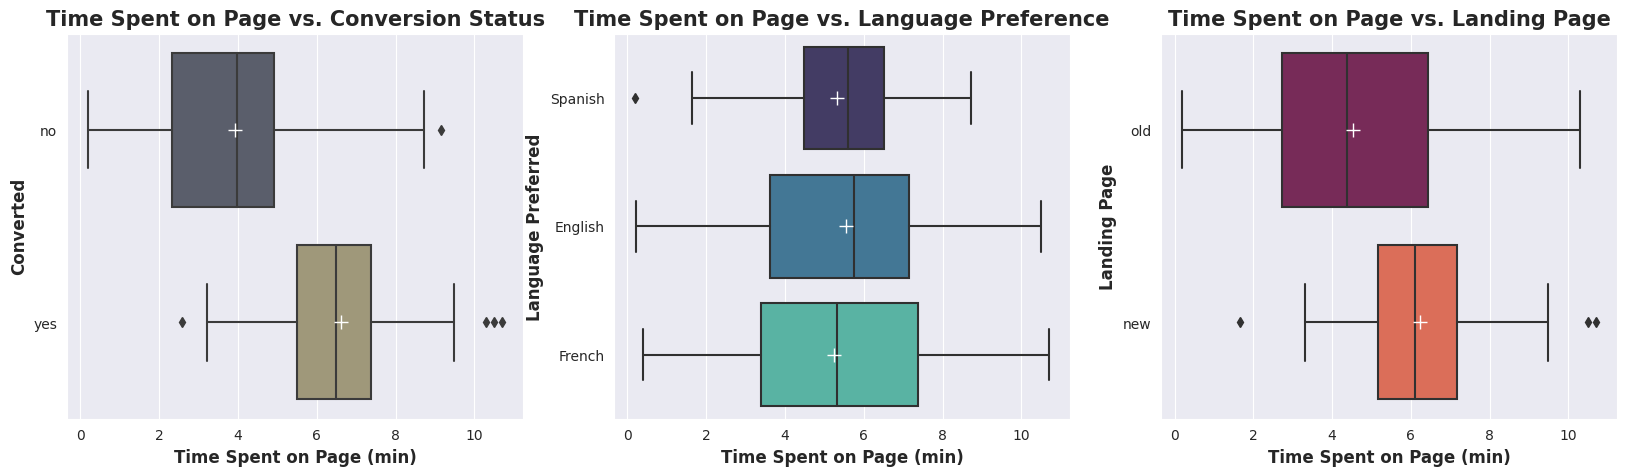

In [ ]:
# Create 3 subplots in 1 rows and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot a boxplot for time vs. conversions
conv_box = sns.boxplot(data=user_data, x='time_spent_on_the_page',
                       y='converted', showmeans=True,
                       meanprops=meanprops_dict, palette='cividis', ax=axes[0]);
conv_box.set_ylabel('Converted', fontdict=label_fontdict);
conv_box.set_title('Time Spent on Page vs. Conversion Status',
                   fontdict=subplot_fontdict)

# Plot a boxplot for time vs. language preferred
lang_box = sns.boxplot(data=user_data, x='time_spent_on_the_page',
                       y='language_preferred', showmeans=True,
                       meanprops=meanprops_dict, palette='mako', ax=axes[1]);
lang_box.set_ylabel('Language Preferred', fontdict=label_fontdict);
lang_box.set_title('Time Spent on Page vs. Language Preference',
                   fontdict=subplot_fontdict)

# Plot a boxplot for time vs. landing page
page_box = sns.boxplot(data=user_data, x='time_spent_on_the_page',
                       y='landing_page', showmeans=True,
                       meanprops=meanprops_dict, palette='rocket', ax=axes[2]);
page_box.set_ylabel('Landing Page', fontdict=label_fontdict);
page_box.set_title('Time Spent on Page vs. Landing Page',
                   fontdict=subplot_fontdict)

for ax in axes.flat:
  ax.set_xlabel('Time Spent on Page (min)', fontdict=label_fontdict)

Observations:
* Converted vs. Time Spent on Page:
 * Users that convert tended to spend more time on the landing page. The median time spent on the landing page for users that convert is around 6.5 minutes versus 4 for those that do not.
 * Both boxplots that illustrate conversion status and time spend have outliers. The boxplot for users that did not convert has 1 outlier to the right, and the boxplot for users that did convert has 4 outliers, 1 to the left and 3 to the right.
 * The boxplot for users that did not convert exhibits a right skew, while the boxplot for users that did convert appears to have an approximately normal distribution.
 * The variation for the boxplot for users that did not convert is greater than that for those that did.
* Language Preferred vs. Time Spent on Page:
  * The median time spend across the three languages is approximately the same, around 5.5 minutes.
  * The time spend for English and French is approximately equal and greater than that for Spanish.
  * There is only one left outlier for Spanish.
* Landing Page vs. Time Spent on Page (from previous analysis):
 * There are three outliers in the time spent on the new landing page, but none for the time spent on the old page.
 * The time spend on the old landing page has a slight right skew, while the time spend on the new page approximates a normal distribution.
 * The new landing page has a higher minimum and median user time spend than the old landing page.
 * The time spend variation for the new landing page is less than that of the old page.

**Language vs. Converted**

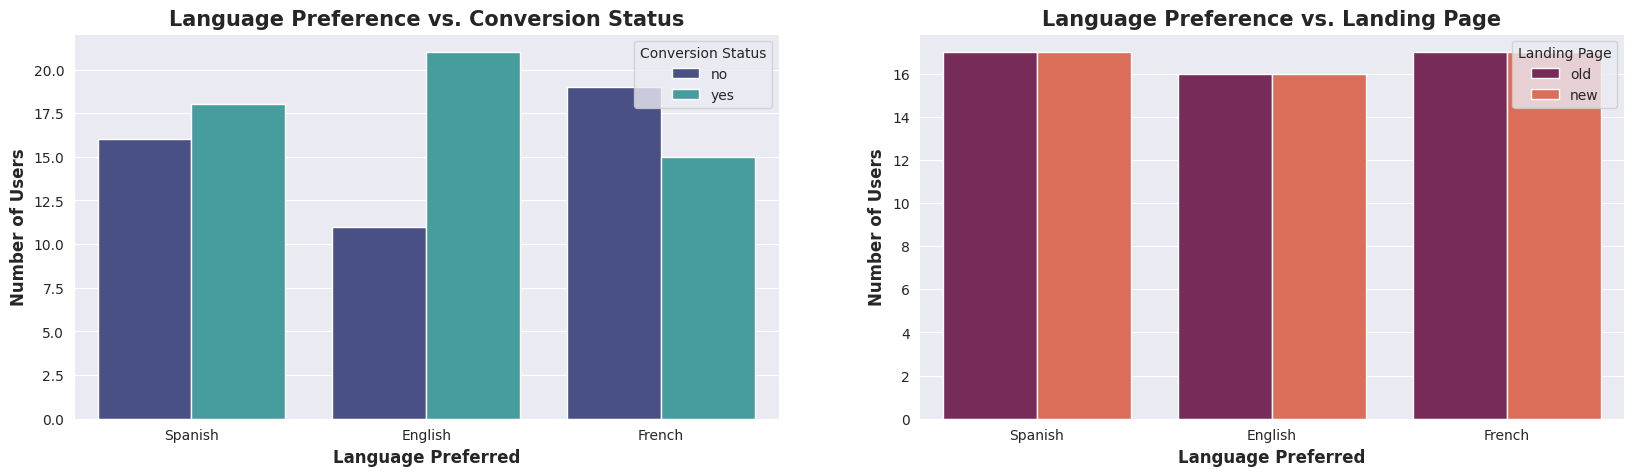

In [ ]:
# Create 2 subplots in 1 rows and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot the countplot for language preferred and conversion status
lang_count = sns.countplot(data=user_data, x='language_preferred',
                           hue='converted', palette='mako', ax=axes[0])
lang_count.set_ylabel('Number of Users', font=label_fontdict);
lang_count.set_title('Language Preference vs. Conversion Status',
                     font=subplot_fontdict);

# Update legend titles
lang_count.get_legend().set_title('Conversion Status')

# Plot the countplot for language preferred and conversion status
page_count = sns.countplot(data=user_data, x='language_preferred',
                           hue='landing_page', palette='rocket', ax=axes[1])
page_count.set_title('Language Preference vs. Landing Page',
                     font=subplot_fontdict);

# Update legend titles
page_count.get_legend().set_title('Landing Page')

for ax in axes.flat:
  ax.set_ylabel('Number of Users', font=label_fontdict);
  ax.set_xlabel('Language Preferred', fontdict=label_fontdict)

Observations:
* Users viewing the landing page in Spanish and English were more likely to convert, while French users mostly did not convert. This difference is the most notable for the English language.
* The study selected the same amount of users to view each landing page for each of the languages.


**Converted vs. Landing Page**

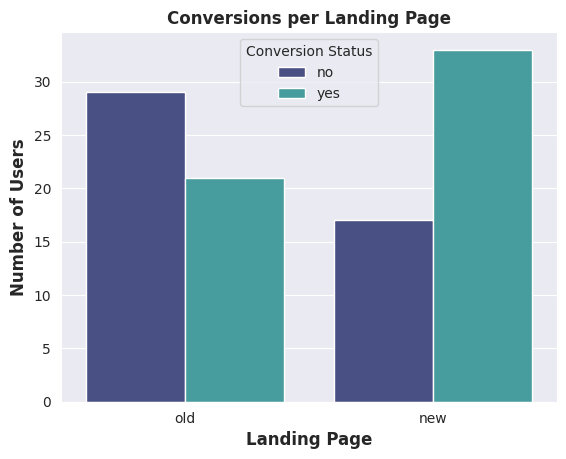

In [ ]:
# Set title
plt.title("Conversions per Landing Page", fontweight='bold')

# Plot the countplot
page_count = sns.countplot(data=user_data, x='landing_page', hue='converted',
                           palette='mako')

# Update legend titles
page_count.get_legend().set_title('Conversion Status')

# Set title
page_count.set_xlabel('Landing Page', font=label_fontdict)
page_count.set_ylabel('Number of Users', font=label_fontdict);

Observations:
* Around half of the users who viewed the new landing page converted, which is significantly higher than the conversion rate of those that were served the old page.
* The old landing page experienced a higher rate of non-conversion among users.

****

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

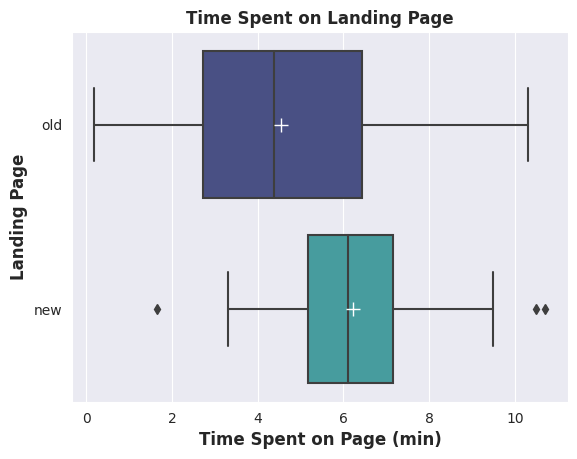

In [ ]:
# Set title
plt.title("Time Spent on Landing Page", fontweight='bold')

# Plot the boxplot
time_box = sns.boxplot(data=user_data, x='time_spent_on_the_page',
                       y='landing_page', showmeans=True,
                       meanprops=meanprops_dict, palette='mako')

# Set labels
time_box.set_ylabel('Landing Page', fontdict=label_fontdict)
time_box.set_xlabel('Time Spent on Page (min)', fontdict=label_fontdict);

Observations (from previous analysis):
* There are three outliers in the time spent on the new landing page, but none for the time spent on the old page.
* The time spend on the old landing page has a slight right skew, while the time spend on the new page approximates a normal distribution.
* The new landing page has a higher minimum, median and mean user time spend than the old landing page.
* The time spend variation for the new landing page is less than that of the old page.

### Step 1: Define the null and alternate hypotheses

Let $\mu_{old}$, $\mu_{new}$ be the mean time E-News Express users spent on the old and new landing pages respectively.

We will test the null hypothesis, which states that the mean time  spent on the old landing page is the same as that on the new:

>$H_0:\mu_{old} = \mu_{new}$

against the alternate hypothesis, which states that the mean time spent on the new landing page is greater than that on the existing landing page:

>$H_a:\mu_{old} < \mu_{new}$

### Step 2: Select appropriate test

In [ ]:
# Find the sample means and sample standard deviations for the two samples
old_page_data = user_data[user_data['landing_page'] == 'old']
new_page_data = user_data[user_data['landing_page'] == 'new']

print('The mean time spent on the existing landing page is '
      + str(round(old_page_data['time_spent_on_the_page'].mean(), 3))
      + ' minutes')
print('The mean time spent on the new landing page is '
      + str(round(new_page_data['time_spent_on_the_page'].mean(), 3))
      + ' minutes')

print('The standard deviation of time spent on the existing landing page is '
      + str(round(old_page_data['time_spent_on_the_page'].std(), 3))
      + ' minutes')
print('The standard deviation of time spent on the new landing page is '
      + str(round(new_page_data['time_spent_on_the_page'].std(), 3))
      + ' minutes')

The mean time spent on the existing landing page is 4.532 minutes
The mean time spent on the new landing page is 6.223 minutes
The standard deviation of time spent on the existing landing page is 2.582 minutes
The standard deviation of time spent on the new landing page is 1.817 minutes


Given that the population standard deviations are unknown and that the sample standard deviations are different, the **two independent sample T-test for equality of means** is the appropriate test, provided all the assumptions are satisfied. This will be a one-tailed test.

#### Test whether the T-test assumptions are satisfied or not
* **Continuous data**: Yes, time is measured on a continuous scale.
* **Normally distributed populations**: Yes, given that the sample size for both sets exceeds 30, the Central Limit Theorem suggests the distribution of sample averages will be approximately normal.
* **Independent populations**: Yes, given that the samples are selected from two distinct groups, it is clear that these samples originate from two independent populations.
* **Unequal population standard deviations**: Yes, the variance in the sample standard deviations suggests that the population standard deviations will likely also differ.
* **Random sampling from the population**: Yes, we are informed that the samples taken are simple random samples.

Given that the T-test assumptions hold, we can proceed with the two independent sample T-test for equality of means.

### Step 3: Decide the significance level


As stated in the problem overview:
>$α = 0.05$

### Step 4: Collect and prepare data

In [ ]:
# Create new series for time spent by users on both landing pages
old_page_time = old_page_data['time_spent_on_the_page']
new_page_time = new_page_data['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
# Import the required functions
from scipy.stats import ttest_ind

# Find the p-value
test_stat, p_value = ttest_ind(new_page_time, old_page_time, equal_var = False,
                               alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Print a conclusion based on the provided p_value and a significance level
def print_test_conclusion(p_value, alpha=0.05):
    base_msg = f"Given a p-value of {p_value:.5f} and an alpha of {alpha},"

    if p_value < alpha:
        conclusion = (f"{base_msg} there is sufficient evidence to reject "
                      "the null hypothesis.")
    else:
        conclusion = (f"{base_msg} there is not enough evidence to reject "
                      "the null hypothesis.")

    print(conclusion)

In [ ]:
print_test_conclusion(p_value)

Given a p-value of 0.00014 and an alpha of 0.05, there is sufficient evidence to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value falls below the predetermined level of significance, we can confidently reject the null hypothesis. Consequently, there exists sufficient evidence to support the claim that users spend more time on the new landing page than on the old one.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

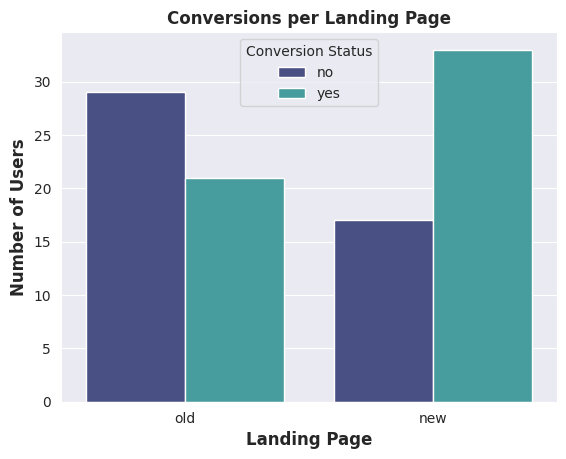

In [ ]:
# Set title
plt.title("Conversions per Landing Page", fontweight='bold')

# Plot the countplot
page_count = sns.countplot(data=user_data, x='landing_page', hue='converted',
                           palette='mako')

# Update legend titles
page_count.get_legend().set_title('Conversion Status')

# Set title
page_count.set_xlabel('Landing Page', font=label_fontdict)
page_count.set_ylabel('Number of Users', font=label_fontdict);

Observations (from previous analysis):
* Around half of the users who viewed the new landing page converted, which is significantly higher than the conversion rate of those that were served the old page.
* The old landing page experienced a higher rate of non-conversion among users.

### Step 1: Define the null and alternate hypotheses

Let $p_{old}$, $p_{new}$ be the proportion of E-News Express users who converted when they were served the old and new landing pages respectively.

We will test the null hypothesis, which states that the conversion rate on the old landing page is the same as that on the new:

>$H_0:p_{old} = p_{new}$

against the alternate hypothesis, which states that the conversion rate on the new landing page is greater than that on the existing landing page:

>$H_a: p_{old} < p_{new}$

### Step 2: Select appropriate test

Given that the data is univariate and discrete, the **two independent sample proportion Z-test** is the appropriate test, provided all the assumptions are satisfied. This will be a one-tailed test.

#### Test whether the Z-test assumptions are satisfied or not

In [ ]:
# Find the number of users in the sample that converted when viewing either
# landing page
old_page_conv_count = (old_page_data['converted'] == 'yes').sum()
new_page_conv_count = (new_page_data['converted'] == 'yes').sum()

print('The number of conversions with the existing landing page is '
      + str(old_page_conv_count))
print('The number of conversions with the new landing page is '
      + str(new_page_conv_count))

# Find the number of users in the control and treatment groups
old_page_user_count = (user_data['group'] == 'control').sum()
new_page_user_count = (user_data['group'] == 'treatment').sum()

print('The number of users in the control group is '
      + str(old_page_user_count))
print('The number of users in the treatment group is '
      + str(new_page_user_count))

The number of conversions with the existing landing page is 21
The number of conversions with the new landing page is 33
The number of users in the control group is 50
The number of users in the treatment group is 50


* **Binomally distributed population**: Yes, a user either converts or does not.
* **Independent populations**: Yes, given that the samples are selected from two distinct groups, it is clear that these samples originate from two independent populations.
* **Random sampling from the population**: Yes, we are informed that the samples taken are simple random samples.
* **Normally distributed populations**: Yes, the Central Limit Theorem asserts that the binomial distribution can be approximated by the normal distribution if two conditions are satisfied:

>   $$np \geq 10$$
>   $$n(1-p) \geq 10$$

where $n,p$ refer to the sample size and sample proportion, respectively.

As shown below, both checks passed for the given sample, thus making the approximation appropriate.

$$
\begin{align*}
n_{old} &= 50, & p_{old} &= \frac{21}{50} \\
n_{new} &= 50, & p_{new} &= \frac{33}{50} \\\\
\end{align*}
$$
$$
\begin{align*}
n_{old}p_{old} &= 21 &\geq 10 \\
n_{old}(1-p_{old}) &= 29 &\geq 10 \\
n_{new}p_{new} &= 33 &\geq 10 \\
n_{new}(1-p_{new}) &= 17 &\geq 10 \\\\
\end{align*}
$$

Given that the Z-test assumptions hold, we can proceed with the two independent sample proportion Z-test.

### Step 3: Decide the significance level


As stated in the problem overview:
>$α = 0.05$

### Step 4: Collect and prepare data

In [ ]:
# Set the counts of conversions
conv_count = np.array([old_page_conv_count, new_page_conv_count])

# Set the sample sizes
nobs = np.array([old_page_user_count, new_page_user_count])

### Step 5: Calculate the p-value

In [ ]:
# Import the required functions
from statsmodels.stats.proportion import proportions_ztest

# Find the p-value
test_stat, p_value = proportions_ztest(conv_count, nobs, alternative='smaller')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
print_test_conclusion(p_value)

Given a p-value of 0.00803 and an alpha of 0.05, there is sufficient evidence to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value falls below the predetermined level of significance, we can confidently reject the null hypothesis. Consequently, there exists sufficient evidence to support the claim that the conversion rate is higher with the new landing page than the old one.

##3. Are the conversion status and preferred language independent or related?


### Perform Visual Analysis

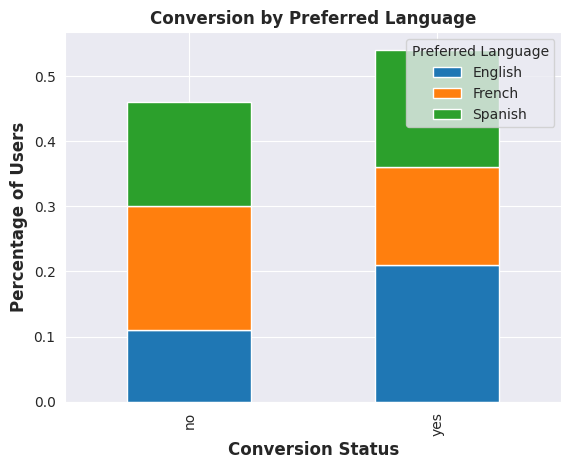

In [ ]:
# Plot the contingency table
chi_cross = pd.crosstab(user_data['converted'], user_data['language_preferred'],
                        normalize=True).plot(kind='bar', stacked=True)

# Set title
chi_cross.set_title('Conversion by Preferred Language', fontdict=label_fontdict)

# Update legend titles
chi_cross.get_legend().set_title('Preferred Language')

# Set axis labels
chi_cross.set_xlabel('Conversion Status', font=label_fontdict)
chi_cross.set_ylabel('Percentage of Users', font=label_fontdict);

Observations:
* The number of Spanish and English users is higher in the converted group than the non-converted group.
* Based on the sample data, it seems that the proportion of subscribers is higher for Spanish and English, but we must verify this inference with a hypothesis test.

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis:

>$H_0$: The converted status and language preference are independent of each other.


against the alternate hypothesis:

>$H_a$: The converted status and language preference are dependent on each other.

### Step 2: Select appropriate test

Given that the data is bivariate and discrete and we are testing  dependence between , the **Chi-square test for independence** is the appropriate test, provided all the assumptions are satisfied.

#### Test whether the Chi-square test assumptions are satisfied or not

In [ ]:
# Prepare a contingency table
contingency_table = pd.crosstab(user_data['converted'],
                                user_data['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


* **Categorical variables**: Yes, conversion status and language preference are categorical in nature.
* **Random sampling from the population**: Yes, we are informed that the samples taken are simple random samples.
* **Expected value of the number of sample observations in each level of the variable is at least 5**: Yes, it can be observed in the contingency table that all entries are greater than 5.

Given that the Chi square-test assumptions hold, we can proceed with the Chi-square test for independence.

### Step 3: Decide the significance level


As stated in the problem overview:
>$α = 0.05$

### Step 4: Collect and prepare data

We will use the previously created contingency table. No other data preparation is necessary.

### Step 5: Calculate the p-value

In [ ]:
# Import the required functions
from scipy.stats import chi2_contingency

# Find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)
print("Degrees of freedom =", dof)

The p-value is 0.21298887487543447
Degrees of freedom = 2


In [ ]:
print("Expected frequencies \n", expected)

Expected frequencies 
 [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [ ]:
print_test_conclusion(p_value)

Given a p-value of 0.21299 and an alpha of 0.05, there is not enough evidence to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is larger than the predetermined level of significance, we fail to reject the null hypothesis. Consequently, we do not have sufficient evidence to claim that conversion status and language preference are dependent on each other.

## 4. Is the time spent on the new page the same for the different language users?

### Perform Visual Analysis

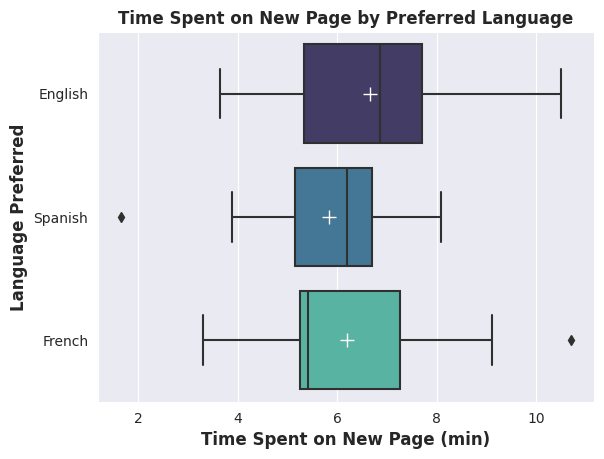

In [ ]:
# Plot a boxplot for time vs. language preferred on the new page
lang_box = sns.boxplot(data=new_page_data, x='time_spent_on_the_page',
                       y='language_preferred', showmeans=True,
                       meanprops=meanprops_dict, palette='mako')

# Set title
lang_box.set_title('Time Spent on New Page by Preferred Language',
                   fontdict=label_fontdict)

# Set axis labels
lang_box.set_ylabel('Language Preferred', fontdict=label_fontdict)
lang_box.set_xlabel('Time Spent on New Page (min)', fontdict=label_fontdict);

Observations:
* The median and mean time spent on the new page is highest for English.
* Spanish has the lowest mean time spent, but French has the lowest median time. This is likely due to the left-side outlier that Spanish has and right-side outlier that French has.
* English and French appear to have similar 25% and 75% percentiles.
* The variance is largest for English and least for Spanish.
* The French distribution is right-skewed, while the Spanish and English distributions appear to be left-skewed.

### Step 1: Define the null and alternate hypotheses

Let $\mu_F$, $\mu_S$, $\mu_E$ be the mean time that E-News Express users, in the respective language groups of French, Spanish, and English, spent on the new landing page.

We will test the null hypothesis, which states that the mean time  spent on the new landing page is the same regardless of language preference:

>$H_0:\mu_F = \mu_S = \mu_E$

against the alternate hypothesis, which states that at least one of the mean times with respect to the three language category is different from the rest:

>$H_a: \exists i \neq j,\text{ such that }\mu_i \neq \mu_j $

### Step 2: Select appropriate test

Given that this problem concerns three population means, the **one-way ANOVA test** is the appropriate test, provided all the assumptions are satisfied.

#### Test whether the ANOVA test assumptions are satisfied or not

##### Verify normality with Shapiro-Wilk's test

We will test the null hypothesis:

>$H_0:$ Time spent on the page follows a normal distribution

against the alternate hypothesis:

>$H_a:$ Time spent on the page does not follow a normal distribution

Moreover, as stated in the problem overview:
>$α = 0.05$

In [ ]:
# Assumption 1: Normality
# Import the required function
from scipy import stats

# Find the p-value
w, p_value = stats.shapiro(new_page_data['time_spent_on_the_page'])
print_test_conclusion(p_value)

Given a p-value of 0.80400 and an alpha of 0.05, there is not enough evidence to reject the null hypothesis.


As the p-value is larger than the predetermined level of significance, we fail to reject the null hypothesis. Consequently, the normality assumption holds.

##### Verify homogeneity of variance with Levene's test

We will test the null hypothesis:

>$H_0:$ All the population variances are equal

against the alternate hypothesis:

>$H_a:$ At least one population variance is different from the rest

Moreover, as stated in the problem overview:
>$α = 0.05$

In [ ]:
# Assumption 2: Homogeneity of Variance
# Import the required function
from scipy.stats import levene

# Distill time spent on new page for each language
time_french = new_page_data[new_page_data['language_preferred'] == "French"]['time_spent_on_the_page']
time_english = new_page_data[new_page_data['language_preferred'] == "English"]['time_spent_on_the_page']
time_spanish = new_page_data[new_page_data['language_preferred'] == "Spanish"]['time_spent_on_the_page']

# Find the p-value
test_stat, p_value = levene(time_french, time_english,
                            time_spanish)
print_test_conclusion(p_value)

Given a p-value of 0.46711 and an alpha of 0.05, there is not enough evidence to reject the null hypothesis.


As the p-value is larger than the predetermined level of significance, we fail to reject the null hypothesis. Consequently, the homogeneity of variance assumption holds.

* **Independent populations**: Yes, given that the samples are selected from three distinct groups, it is clear that these samples originate from three independent populations.
* **Random sampling from the population**: Yes, we are informed that the samples taken are simple random samples.
* **Normally distributed populations**: Yes, the normality assumption was verified using the Shapiro-Wilk’s test.
* **Population variances are equal**: Yes, the homogeniety of variance assumption was verified using the Levene's test.

Given that the ANOVA test assumptions hold, we can proceed with the one-way ANOVA test.

### Step 3: Decide the significance level


As stated in the problem overview:
>$α = 0.05$

### Step 4: Collect and prepare data

We will use the previously created data structures. No other data preparation is necessary.

### Step 5: Calculate the p-value

In [ ]:
# Import the required function
from scipy.stats import f_oneway

# Perform one-way ANOVA test
test_stat, p_value = f_oneway(time_french, time_english, time_spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
print_test_conclusion(p_value)

Given a p-value of 0.43204 and an alpha of 0.05, there is not enough evidence to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is larger than the predetermined level of significance, we fail to reject the null hypothesis. Consequently, we do not have sufficient evidence to claim that at least one of the mean times in the three language categories is different from the others.

## Conclusion and Business Recommendations

### Conclusions
* **Landing Page Engagement**: Utilizing a two independent sample T-test for equality of means, we found compelling evidence (p = 0.00014) to assert that the mean duration users engage with the new landing page significantly exceeds that of the existing page.
* **Conversion Rates**: Through the two independent proportion Z-test, our results (p = 0.00802) indicate that the conversion rate of the new landing page surpasses its predecessor.
* **Conversion Status vs. Language Preference**: A Chi-square test for independence showed no significant relationship (p = 0.21299) between users' language preference and likelihood to convert.
* **User Engagement by Language**: Performing a one-way ANOVA test, we discerned (p = 0.4671) that there isn't substantial evidence to suggest that language preference impacts the average time spent on the new landing page.

### Business Recommendations
1. **Roll Out New Landing Page**: The increase in user engagement and conversion on the new landing page compared to the old one suggests that the updates resonate with users. Thus, it is recommended that E-News Express adopt the new landing page.
2. **Focus Resources on High-Converting Features**: Given that the new landing page improved conversion rates, E-News Express should identify the features and content on the new page that are most closely correlated with conversion. This analysis should also examine click-through rates and user drop-off points.
3. **Explore Engagement and Conversion Correlation**: Preliminary observations from our sample suggest a positive correlation between users' time spent on the landing page and their conversion rate. It is recommended that E-News Express conduct further statistical tests to validate this observation and, if true, explore strategies such as refining the layout and content to further boost user engagement.
4. **Do Not Prioritize Language-Specific Conversion Strategies**: This analysis suggests that language-specific content may not be necessary for conversion, and thus efforts to target users based solely on language may not yield significant results. This, however, does not mean that E-News Express should not mantain content in multiple languages.
5. **Seek User Feedback for Further Analysis**: E-News Express should collect feedback from users, through online surveys, focus groups, or interviews, to gain deeper insights into user likes and dislikes on the landing page.
6. **Continue A/B Testing for Ongoing Improvement**: While the new landing page outperforms its predecessor, E-News Express should conduct A/B tests on various page elements, such as content placement, headlines and call-to-action buttons, and persistently monitor user behavior metrics to maintain a steady growth in conversion rate.

___